<h1 style="text-align:center;">Лабораторная работа №1</h1>

<h2 style="text-align:center;">Решение задачи экстраполяции различными методами</h2>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>


Цель: решить выбранную задачу перечисленными методами: 
1. Классическая полиномиальная интерполяция по Ньютону
2. Сплайн-интерполяция
3. Метод наименьших квадратов

В чем суть?

**Аппроксимация** — научный метод, состоящий в замене одних объектов другими, в каком-то смысле близкими к исходным, но более простыми.Простыми словами, аппроксимировать — это заменить одни результаты другими, близкими к исходным, но упрощёнными. 

**Интерполяция** - нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом.


**Экстраполяция** - особый тип аппроксимации, при котором функция аппроксимируется вне заданного интервала, а не между заданными значениями. Иными словами, экстраполяция — приближённое определение значений функции $f(x)$ в точках $x$,
 лежащих вне отрезка $[x_{0},x_{n}]$, по её значениям в точках $x_{0}<x_{1}<...<x_{n}$.


<img src="image.png" alt="drawing" width="650"/>


Итак, с помощью аппроксимации мы находим функцию приближенным методом. 

С помощью интерполяции или экстраполяции находим значение нужных точек внутри таблицы или за её пределами.

<img src="task_lab_4.png" alt="drawing" width="650"/>

In [175]:
%matplotlib inline
import numpy as np
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

Запишем данные о населении CCCР за с 1920 по 1985 в массивы.
Возьмем 2 варианта - информацию о населении с периодом в 5 и 110 лет, чтобы сравнить, как влияет количество точек на качество интерполяции.

Данные взяты с https://ru.wikipedia.org/wiki/Население_СССР

In [176]:
years_5 =      [1920,      1925,      1930,      1935,      1940,      1945,      1950,      1955,      1960,       1965,      1970,      1975,      1980,       1985]      #годы
population_5 = [137727000, 143003000, 157432000, 158167000, 192598000, 170548000, 179229000, 194400000, 212400000,  229600000, 241700000, 253300000, 264500000,  276300000] #население

years_10 =      [1920,      1930,      1940,       1950,      1960,      1970,      1980]      #годы
population_10 = [137727000, 157432000, 192598000,  179229000, 212400000, 241700000, 264500000] #население


years_small =      [ 1950,      1960,      1970,      1980]      #годы
population_small = [ 179229000, 212400000, 241700000, 264500000] #население

#Данные для проверки экстраполяции
x_true = [1915,      1991]
y_true = [159200000, 294008571]


**1) Классическая полиномиальная интерполяция по Ньютону.**

<img src="sep_diff_.png" alt="drawing" width="580"/>
<img src="sep_diff.png" alt="drawing" width="650"/>

Сначала посчитаем разделенные разности для данных и используем эту функцию в основной.

In [177]:
# функция вычисляет разделенные разности
def sep_diff(x, y):
    n = len(x) #количество данных
    dif = np.zeros([n, n])
    
    for i in range(n):
        dif[i, 0] = y[i]  # Первая колонка - значения y
    
    for j in range(1, n): #столбцы все кроме 0го
        for i in range(n - j): # строки - от 0 по n-j-1
            dif[i][j] = (dif[i + 1][j - 1] - dif[i][j - 1]) / (x[i + j] - x[i])
    
    return dif[0, :]  # Возвращаем первую строку (коэффициенты)


In [178]:
def Newton(x, coef, x_val):
    # x_val - точка для расчета интерполяционного многочлена
    n = len(coef)
    result = coef[0]  # Начальное значение - первый коэффициент
    product = 1       # Для накопления произведения
    
    for i in range(1, n):
        product *= (x_val - x[i - 1])  # Произведение (x_val - x[j]) от j=0 до i-1
        result += coef[i] * product   # Добавляем текущее слагаемое
    
    return result

In [179]:
# Вычисление коэффициентов
coeffs_10 =    sep_diff(years_10, population_10)
coeffs_5 =     sep_diff(years_5, population_5)
coeffs_small = sep_diff(years_small, population_small)

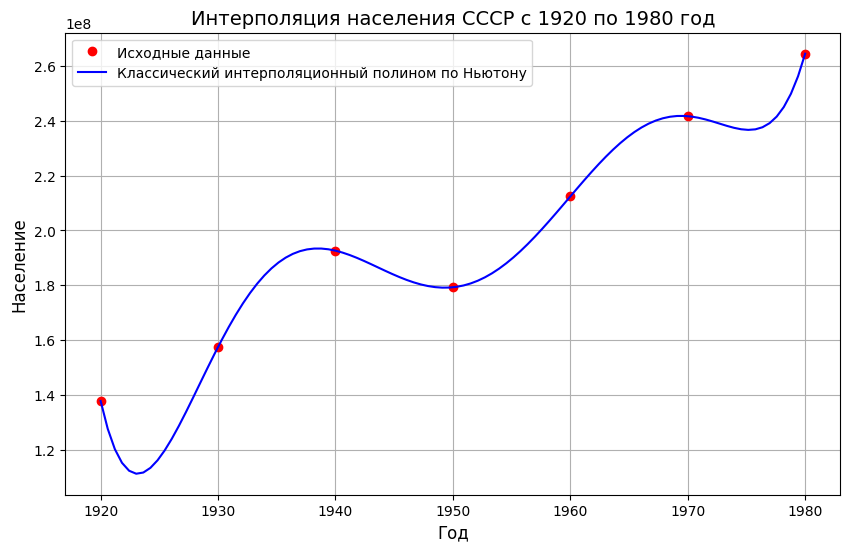

In [180]:
# Создание плотных точек для построения графика
x_dense = np.linspace(1920, 1980, 100)
y_dense = [Newton(years_10, coeffs_10, xi) for xi in x_dense]

# Построение графика
plt.figure(figsize=(10, 6))

#исходные данные - заданные для интерполяции точки
plt.plot(years_10, population_10, 'o', label='Исходные данные', color='red')
#производим интерполяцию по выбранным точкам
plt.plot(x_dense, y_dense, label='Классический интерполяционный полином по Ньютону', color='blue')

plt.title('Интерполяция населения СССР с 1920 по 1980 год', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()


Итак, интерполяция производится отлично, на гладкость кривой мы можем влиять третьим параметром в строчке x_dense = np.linspace(1920, 1980, 100) - чем он больше, тем в большем количестве точек мы посчитаем значение полинома и тем более гладкая кривая получится.

Посмотрим на возможности метода в экстраполяции.


In [181]:

extrapolate_10 = []
for l in range(len(x_true)):
    year = x_true[l]
    newton = Newton(years_10, coeffs_10, year)
    extrapolate_10.append(newton)
    print(f"Оценка населения в {year} году:    {newton:.0f}")
    print(f"Реальное  население в {year} году: {y_true[l]:.0f}")

Оценка населения в 1915 году:    384418995
Реальное  население в 1915 году: 159200000
Оценка населения в 1991 году:    1210090219
Реальное  население в 1991 году: 294008571


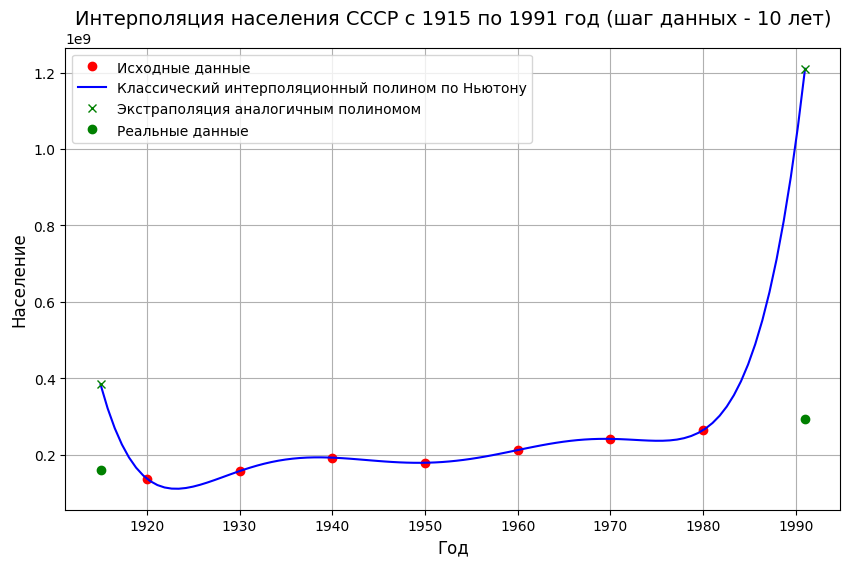

In [182]:
# Создание плотных точек для построения графика
x_dense = np.linspace(1915, 1991, 100) # чем больше здесь точек, тем более гладкая прямая
y_dense = [Newton(years_10, coeffs_10, xi) for xi in x_dense]

# Построение графика
plt.figure(figsize=(10, 6))

#исходные данные - заданные для интерполяции точки
plt.plot(years_10, population_10, 'o', label='Исходные данные', color='red')

#производим интерполяцию по выбранным точкам
plt.plot(x_dense, y_dense, label='Классический интерполяционный полином по Ньютону', color='blue')

# проводим экстраполяцию для точек 1915 и 1991
plt.plot(x_true, extrapolate_10, 'x', label='Экстраполяция аналогичным полиномом', color='green')
#реальные данные - для проверки экстраполяции
plt.plot(x_true, y_true, 'o', label='Реальные данные', color='green')


plt.title('Интерполяция населения СССР с 1915 по 1991 год (шаг данных - 10 лет)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()


Посмотрим, как повлияет на качество экстраполяции увеличение числа точек в 2 раза. 

In [183]:

extrapolate_5 = []
for l in range(len(x_true)):
    year = x_true[l]
    newton = Newton(years_5, coeffs_5, year)
    extrapolate_5.append(newton)
    print(f"Оценка населения в {year} году:    {newton:.0f}")
    print(f"Реальное  население в {year} году: {y_true[l]:.0f}")


Оценка населения в 1915 году:    56401666000
Реальное  население в 1915 году: 159200000
Оценка населения в 1991 году:    -46692914850
Реальное  население в 1991 году: 294008571


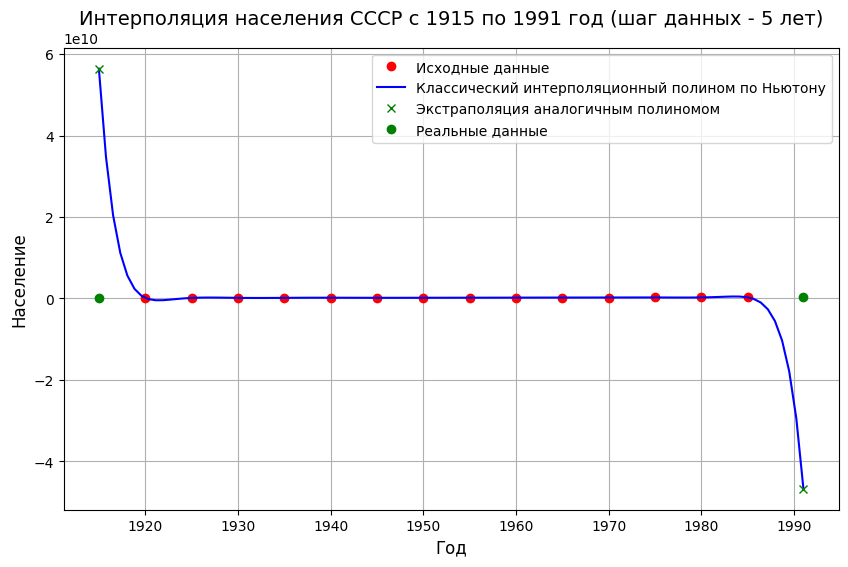

In [184]:
# Создание плотных точек для построения графика
x_dense = np.linspace(1915, 1991, 100) # чем больше здесь точек, тем более гладкая прямая
y_dense = [Newton(years_5, coeffs_5, xi) for xi in x_dense]

# Построение графика
plt.figure(figsize=(10, 6))

#исходные данные - заданные для интерполяции точки
plt.plot(years_5, population_5, 'o', label='Исходные данные', color='red')

#производим интерполяцию по выбранным точкам
plt.plot(x_dense, y_dense, label='Классический интерполяционный полином по Ньютону', color='blue')

# проводим экстраполяцию для точек 1915 и 1991
plt.plot(x_true, extrapolate_5, 'x', label='Экстраполяция аналогичным полиномом', color='green')
#реальные данные - для проверки экстраполяции
plt.plot(x_true, y_true, 'o', label='Реальные данные', color='green')


plt.title('Интерполяция населения СССР с 1915 по 1991 год (шаг данных - 5 лет)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()


Как можем видеть, этот метод для экстраполяции не подходит! Причем при увеличении количества точек все становится только хуже.

Интерполяция Ньютона строит полином степени $𝑛−1$ для $𝑛$ точек. Полиномы высокой степени имеют тенденцию к чрезмерным осцилляциям (эффект Рунге), особенно за пределами диапазона данных. На графике видно, что это приводит к экспоненциальному росту предсказаний как слева, так и справа. Также при экстраполяции добавляются большие члены, зависящие от разностей между экстремальными значениями $x$ и точкой экстраполяции $𝑥𝑣𝑎𝑙$.

Феномен Рунге — в численном анализе эффект нежелательных осцилляций (колебаний), возникающий при интерполяции полиномами высоких степеней. Был открыт Карлом Рунге при изучении ошибок полиномиальной интерполяции для приближения некоторых функций.

Добавление новых точек для полиномиальной интерполяции в методе Ньютона или любом другом аналогичном подходе (например, интерполяция Лагранжа) усугубляет эффект Рунге, особенно при высоких степенях полинома.

<img src="runge.png" alt="drawing" width="600"/>

Как уменьшить этот негативный эффект?
1) уменьшить диапазон данных 
2) добавить больше точек на краях диапазона
3) нормализовать данные на меньший диапазон, например, $[0, 1]$

Попробуем 1й пункт - оставим данные с 1950 по 1980 годы, 4 точки



In [185]:
extrapolate_small = []
year = 1975
newton = Newton(years_small, coeffs_small, year)
extrapolate_small.append(newton)
print(f"Оценка населения в {year} году:    {newton:.0f}")
print(f"Реальное  население в {year} году: {y_true[l]:.0f}")

Оценка населения в 1975 году:    254076812
Реальное  население в 1975 году: 294008571


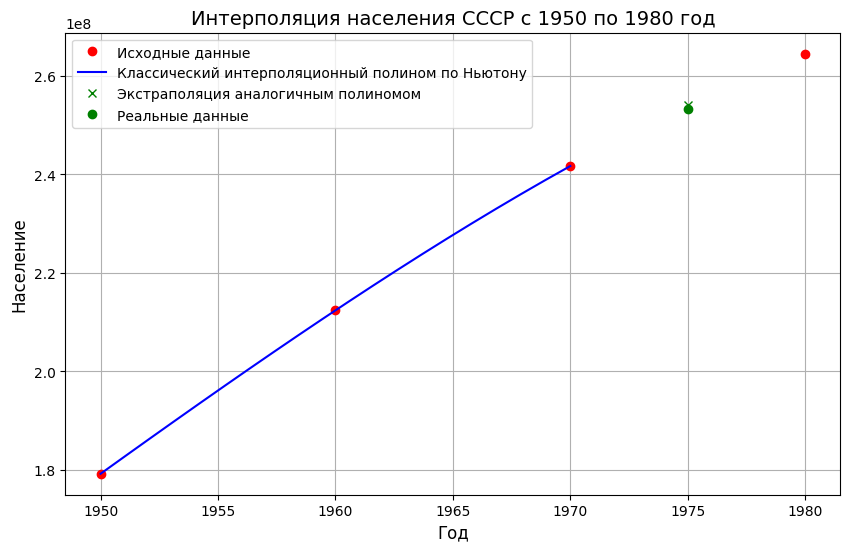

In [187]:
# Создание плотных точек для построения графика
x_dense = np.linspace(1950, 1970, 20) # чем больше здесь точек, тем более гладкая прямая
y_dense = [Newton(years_small, coeffs_small, xi) for xi in x_dense]

# Построение графика
plt.figure(figsize=(10, 6))

#исходные данные - заданные для интерполяции точки
plt.plot(years_small, population_small, 'o', label='Исходные данные', color='red')

#производим интерполяцию по выбранным точкам
plt.plot(x_dense, y_dense, label='Классический интерполяционный полином по Ньютону', color='blue')

# проводим экстраполяцию для точек 1915 и 1991
plt.plot([1975], extrapolate_small, 'x', label='Экстраполяция аналогичным полиномом', color='green')
#реальные данные - для проверки экстраполяции
plt.plot([1975], [253300000], 'o', label='Реальные данные', color='green')


plt.title('Интерполяция населения СССР с 1950 по 1980 год', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()


Как видим, теперь экстраполяция дает уже очень близкие к реальным значения!

**2) Сплайн-интерполяция.**

Сначала посмотрим на работу встроенной функции кубического сплайна.

In [198]:
from scipy.interpolate import CubicSpline

# Кубическая интерполяция
cs = CubicSpline(years_10, population_10, extrapolate=True)

extrapolate = []
for l in range(len(x_true)):
    year = x_true[l]
    spl = cs(year)
    extrapolate.append(spl)
    print(f"Оценка населения в {year} году:    {spl:.0f}")
    print(f"Реальное  население в {year} году: {y_true[l]:.0f}")
    


Оценка населения в 1915 году:    170500316
Реальное  население в 1915 году: 159200000
Оценка населения в 1991 году:    310002979
Реальное  население в 1991 году: 294008571


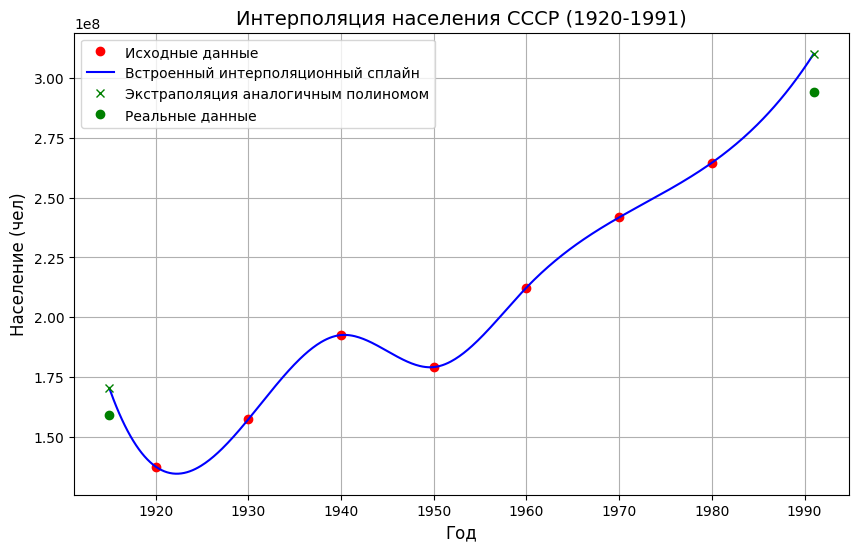

In [204]:


# Построение графика
plt.figure(figsize=(10, 6))

# Подготовка данных для графика
x_interp = np.linspace(1915, 1991, 500)  # значения x от минимального до 1991 года
y_interp = cs(x_interp)  # интерполированные значения

#исходные данные - заданные для интерполяции точки
plt.plot(years_10, population_10, 'o', label='Исходные данные', color='red')

#производим интерполяцию по выбранным точкам
plt.plot(x_interp, y_interp, label='Встроенный интерполяционный сплайн', color='blue')

# проводим экстраполяцию для точек 1915 и 1991
plt.plot(x_true, extrapolate, 'x', label='Экстраполяция аналогичным полиномом', color='green')
#реальные данные - для проверки экстраполяции
plt.plot(x_true, y_true, 'o', label='Реальные данные', color='green')




# Оформление графика
plt.title("Интерполяция населения СССР (1920-1991)", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Население (чел)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


Теперь напишем свой сплайн.